# Least square

In [84]:
import numpy as np
import scipy as sp
import pylab as pl
import cvxopt
from cvxopt import matrix
from cvxopt import solvers

sampx = np.loadtxt('polydata_data_sampx.txt') 
sampy = np.loadtxt('polydata_data_sampy.txt')
polyx = np.loadtxt('polydata_data_polyx.txt') 
polyy = np.loadtxt('polydata_data_polyy.txt')

#5th orders
K = 5
def PHI(K,data):
    phi = []
    for i in range(0, K + 1):
        phi_inter = data ** i
        phi.append(phi_inter)
    phi = np.mat(phi)
    return phi
phisamp = PHI(K,sampx)
phiploy = PHI(K,polyx)

def plots(samp_x,samp_y,ploy_x,ploy_y,estimators):
    pl.plot(sampx,sampy,'bo',label='samples')
    pl.plot(polyx,np.dot(np.transpose(PHI(K,polyx)),ls),label='function')
    pl.plot(polyx,polyy,label='True function')
    #if()
    pl.title('LS')
    pl.legend() 
    pl.savefig("LS.jpg")
    pl.close()
    return

# Least square

Estimated parameters:  [[  6.15769274e-01]
 [  1.10406633e+00]
 [  1.33022515e+00]
 [ -6.93228415e-01]
 [  9.17835000e-04]
 [ -6.86117508e-01]]


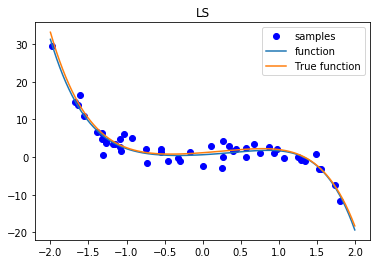

In [85]:
#LS
def poly_LS(phi,y):
    return (phi * np.transpose(phi)).I * phi * np.transpose(np.mat(y))
ls = poly_LS(phisamp,sampy)
print('Estimated parameters: ',ls)
pl.plot(sampx,sampy,'bo',label='samples')
pl.plot(polyx,np.dot(np.transpose(PHI(K,polyx)),ls),label='function')
pl.plot(polyx,polyy,label='True function')
pl.title('LS')
pl.legend() 
pl.savefig("LS.jpg")
pl.show()

# Regularized LS

Estimated parameters:  [[ 0.68185088]
 [ 0.8032859 ]
 [ 1.17035187]
 [-0.43660814]
 [ 0.04726588]
 [-0.73411837]]


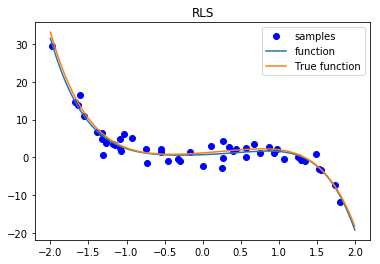

In [86]:
#RLS
def poly_RLS(phi,y,Labmda):
    return ((phi * np.transpose(phi) + Labmda * np.eye(np.shape(phi)[0])).I) * phi * np.transpose(np.mat(y))
rls = poly_RLS(phisamp,sampy,1)
print('Estimated parameters: ',rls)
pl.plot(sampx,sampy,'bo',label='samples')
pl.plot(polyx,np.dot(np.transpose(PHI(K,polyx)),rls),label='function')
pl.plot(polyx,polyy,label='True function')
pl.title('RLS')
pl.legend()
pl.savefig("RLS.jpg")
pl.show()

# LASSO

     pcost       dcost       gap    pres   dres
 0: -1.0534e+03 -1.0396e+03  2e+01  9e+00  3e-16
 1: -1.0398e+03 -1.0385e+03  2e+00  8e-01  2e-16
 2: -1.0376e+03 -1.0376e+03  1e-01  4e-02  2e-16
 3: -1.0375e+03 -1.0375e+03  6e-03  3e-16  7e-17
 4: -1.0375e+03 -1.0375e+03  3e-04  3e-16  1e-16
Optimal solution found.
Estimated parameters:  [ 6.26e-01]
[ 5.91e-01]
[ 1.31e+00]
[-1.89e-01]
[ 6.55e-04]
[-7.92e-01]



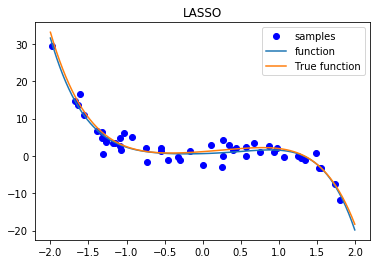

In [87]:
#LASSO
def poly_LASSO(phi,y,Lambda):
    phiphiT = phi * np.transpose(phi)
    H = np.vstack(((np.hstack((phiphiT,-1 * phiphiT))),
              (np.hstack((-1 * phiphiT, phiphiT)))))    
    phiy = np.vstack((phi * np.transpose(np.mat(y)),-1 * phi * np.transpose(np.mat(y))))
    f = Lambda * np.ones(phiy.shape) - phiy
    G = np.eye(len(f))*-1
    h = np.zeros(len(f))
    sol = solvers.qp(matrix(H),matrix(f),matrix(G),matrix(h))
    x = sol['x']
    theta = x[:int(len(x)/2)]- x[int(len(x)/2):]
    return theta
lasso = poly_LASSO(phisamp,sampy,1)
print('Estimated parameters: ',lasso)
pl.plot(sampx,sampy,'bo',label='samples')
pl.plot(polyx,np.dot(np.transpose(PHI(K,polyx)),lasso),label='function')
pl.plot(polyx,polyy,label='True function')
pl.title('LASSO')
pl.legend()
pl.savefig("LASSO.jpg")
pl.show()

# RR

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.5527e-15  3e+02  9e-01  2e-15  1e+00
 1:  3.9223e+01  3.9399e+01  6e+01  2e-01  4e-15  4e-01
 2:  5.8134e+01  5.8186e+01  1e+01  4e-02  3e-14  1e-01
 3:  6.3314e+01  6.3326e+01  2e+00  7e-03  4e-14  2e-02
 4:  6.4289e+01  6.4291e+01  4e-01  1e-03  7e-14  3e-03
 5:  6.4452e+01  6.4452e+01  7e-02  2e-04  7e-14  6e-04
 6:  6.4483e+01  6.4483e+01  3e-03  8e-06  1e-13  2e-05
 7:  6.4484e+01  6.4484e+01  3e-05  8e-08  6e-14  2e-07
Optimal solution found.
Estimated parameters:  [[ 1.01563532]
 [ 1.86713473]
 [ 0.26492436]
 [-1.70405034]
 [ 0.34503254]
 [-0.40769652]]


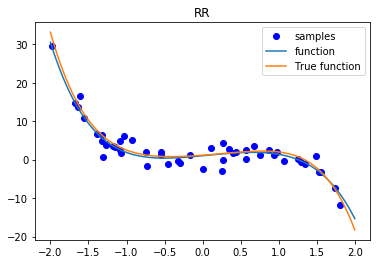

In [88]:
#RR
def poly_RR(phi,y):
    A = np.vstack(((np.hstack((-1 * np.transpose(phi),-1*np.eye(np.shape(np.transpose(phisamp))[0])))),
              (np.hstack((np.transpose(phi), -1*np.eye(np.shape(np.transpose(phisamp))[0]))))))  
    b = np.hstack((-y,y))
    f = np.hstack((np.zeros(np.shape(np.transpose(phisamp))[1]),np.ones(np.shape(np.transpose(phisamp))[0])))
    sol = solvers.lp(matrix(f),matrix(A),matrix(b))
    theta = np.array(sol['x'][:np.shape(np.transpose(phisamp))[1]])   
    return theta

rr = poly_RR(phisamp,sampy)
print('Estimated parameters: ',rr)
pl.plot(sampx,sampy,'bo',label='samples')
pl.plot(polyx,np.dot(np.transpose(PHI(K,polyx)),rr),label='function')
pl.plot(polyx,polyy,label='True function')
pl.title('RR')
pl.legend()
pl.savefig("RR.jpg")
pl.show()

# Bayesian regression

Estimated parameters:  [[ 31.28034953]
 [ 28.6412853 ]
 [ 26.19000582]
 [ 23.91590465]
 [ 21.80880162]
 [ 19.85893382]
 [ 18.05694668]
 [ 16.39388496]
 [ 14.86118383]
 [ 13.45065986]
 [ 12.15450208]
 [ 10.96526301]
 [  9.8758497 ]
 [  8.87951475]
 [  7.96984735]
 [  7.14076433]
 [  6.38650115]
 [  5.701603  ]
 [  5.08091577]
 [  4.51957714]
 [  4.01300756]
 [  3.55690134]
 [  3.14721763]
 [  2.78017149]
 [  2.45222493]
 [  2.1600779 ]
 [  1.90065937]
 [  1.67111836]
 [  1.46881493]
 [  1.29131127]
 [  1.13636271]
 [  1.00190874]
 [  0.88606406]
 [  0.78710964]
 [  0.7034837 ]
 [  0.63377278]
 [  0.57670276]
 [  0.5311299 ]
 [  0.4960319 ]
 [  0.47049888]
 [  0.45372445]
 [  0.44499674]
 [  0.44368944]
 [  0.44925281]
 [  0.46120474]
 [  0.47912178]
 [  0.50263014]
 [  0.5313968 ]
 [  0.56512047]
 [  0.60352264]
 [  0.64633864]
 [  0.69330868]
 [  0.74416882]
 [  0.7986421 ]
 [  0.85642948]
 [  0.91720094]
 [  0.98058648]
 [  1.04616719]
 [  1.11346622]
 [  1.1819399 ]
 [  1.25096869]
 

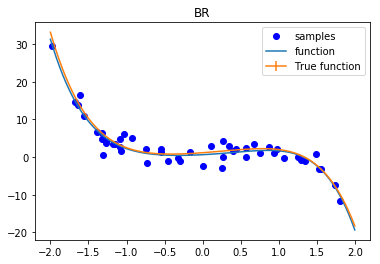

In [114]:
#Bayesian regression
def posterior(y,phi,alpha,sigma):
    thelta_cov = (1/alpha * np.eye(np.shape(phi)[0]) + 1/(sigma ** 2) * phi * np.transpose(phi)).I
    thelta_mean = 1/(sigma ** 2) * thelta_cov * phi * np.transpose(np.mat(y))
    return thelta_mean,thelta_cov
def poly_BR(x,thelta_mean,thelta_cov,K):
    thelta_mean_star = np.transpose(PHI(K,x)) * thelta_mean
    thelta_cov_star = np.transpose(PHI(K,x)) * thelta_cov * thelta_cov * PHI(K,x)
    return thelta_mean_star,thelta_cov_star
post = posterior(sampy, phisamp, 0.1, 0.1)
br = poly_BR(polyx,post[0],post[1],K)

print('Estimated parameters: ',br[0])
pl.plot(sampx,sampy,'bo',label='samples')
pl.plot(polyx,br[0],label='function')
pl.errorbar(polyx,polyy,np.sqrt(np.diag(br[1])),label='True function')

pl.title('BR')
pl.legend()
pl.savefig("BR.jpg")
pl.show()

In [111]:
np.shape(br[1])
np.sqrt(np.diag(br[1]))
np.diag(br[1])

array([  7.45225933e-06,   3.64348466e-06,   1.54501245e-06,
         5.81993536e-07,   3.25292871e-07,   4.63460352e-07,
         7.78781651e-07,   1.12696880e-06,   1.42008378e-06,
         1.61232019e-06,   1.68829862e-06,   1.65355980e-06,
         1.52696731e-06,   1.33475703e-06,   1.10599517e-06,
         8.69229519e-07,   6.50140339e-07,   4.70017458e-07,
         3.44909236e-07,   2.85306829e-07,   2.96243724e-07,
         3.77705923e-07,   5.25262397e-07,   7.30838642e-07,
         9.83568202e-07,   1.27066821e-06,   1.57829500e-06,
         1.89234516e-06,   2.19917538e-06,   2.48622232e-06,
         2.74250961e-06,   2.95903559e-06,   3.12903982e-06,
         3.24815107e-06,   3.31442284e-06,   3.32826574e-06,
         3.29228806e-06,   3.21105803e-06,   3.09080230e-06,
         2.93905596e-06,   2.76428004e-06,   2.57546183e-06,
         2.38171347e-06,   2.19188300e-06,   2.01419118e-06,
         1.85590605e-06,   1.72306539e-06,   1.62025572e-06,
         1.55045437e-06,